<a href="https://colab.research.google.com/github/Running-Machine-ML23-2/problem_1/blob/main/Final_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from itertools import combinations
from sklearn.model_selection import train_test_split
import numpy as np

# 피처 목록
features = [X2_all, X1_all, X_mon_bursts, X_mon_cumsum, X_CAT1, X_CAT2, X_CAT4]
feature_names = ['X2_all', 'X1_all', 'X_mon_bursts', 'X_mon_cumsum', 'X_CAT1', 'X_CAT2', 'X_CAT4']  # 피처 이름

# 결과를 저장할 딕셔너리
results = {}

# 가능한 모든 조합에 대해
for r in range(1, len(features) + 1):
    for subset_indices in combinations(range(len(features)), r):  # 인덱스로 조합 생성
        subset = [features[i] for i in subset_indices]  # 선택된 피처 리스트
        subset_names = [feature_names[i] for i in subset_indices]  # 선택된 피처 이름 리스트

        # 피처를 합칩니다
        X = np.concatenate([np.array(feature) for feature in subset], axis=1)
        # 훈련 데이터와 테스트 데이터 나누기
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # 모델 초기화 (Random Forest)
        rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed

        # 모델 학습
        rf_classifier.fit(X_train, y_train)

        # 예측
        y_pred = rf_classifier.predict(X_test)

        # 성능 평가
        accuracy = accuracy_score(y_test, y_pred)

        # 결과 저장
        results[tuple(subset_names)] = accuracy  # 키를 튜플로 변환

# 결과 출력
for subset, accuracy in results.items():
    print("Features: ", subset)
    print("Accuracy: {:.3f}".format(accuracy))


Features:  ('X2_all',)
Accuracy: 0.873
Features:  ('X1_all',)
Accuracy: 0.426
Features:  ('X_mon_bursts',)
Accuracy: 0.907
Features:  ('X_mon_cumsum',)
Accuracy: 0.875
Features:  ('X_CAT1',)
Accuracy: 0.191
Features:  ('X_CAT2',)
Accuracy: 0.124
Features:  ('X_CAT4',)
Accuracy: 0.085
Features:  ('X2_all', 'X1_all')
Accuracy: 0.785
Features:  ('X2_all', 'X_mon_bursts')
Accuracy: 0.929
Features:  ('X2_all', 'X_mon_cumsum')
Accuracy: 0.882
Features:  ('X2_all', 'X_CAT1')
Accuracy: 0.913
Features:  ('X2_all', 'X_CAT2')
Accuracy: 0.910
Features:  ('X2_all', 'X_CAT4')
Accuracy: 0.877
Features:  ('X1_all', 'X_mon_bursts')
Accuracy: 0.817
Features:  ('X1_all', 'X_mon_cumsum')
Accuracy: 0.850
Features:  ('X1_all', 'X_CAT1')
Accuracy: 0.481
Features:  ('X1_all', 'X_CAT2')
Accuracy: 0.465
Features:  ('X1_all', 'X_CAT4')
Accuracy: 0.449
Features:  ('X_mon_bursts', 'X_mon_cumsum')
Accuracy: 0.931
Features:  ('X_mon_bursts', 'X_CAT1')
Accuracy: 0.917
Features:  ('X_mon_bursts', 'X_CAT2')
Accuracy: 0

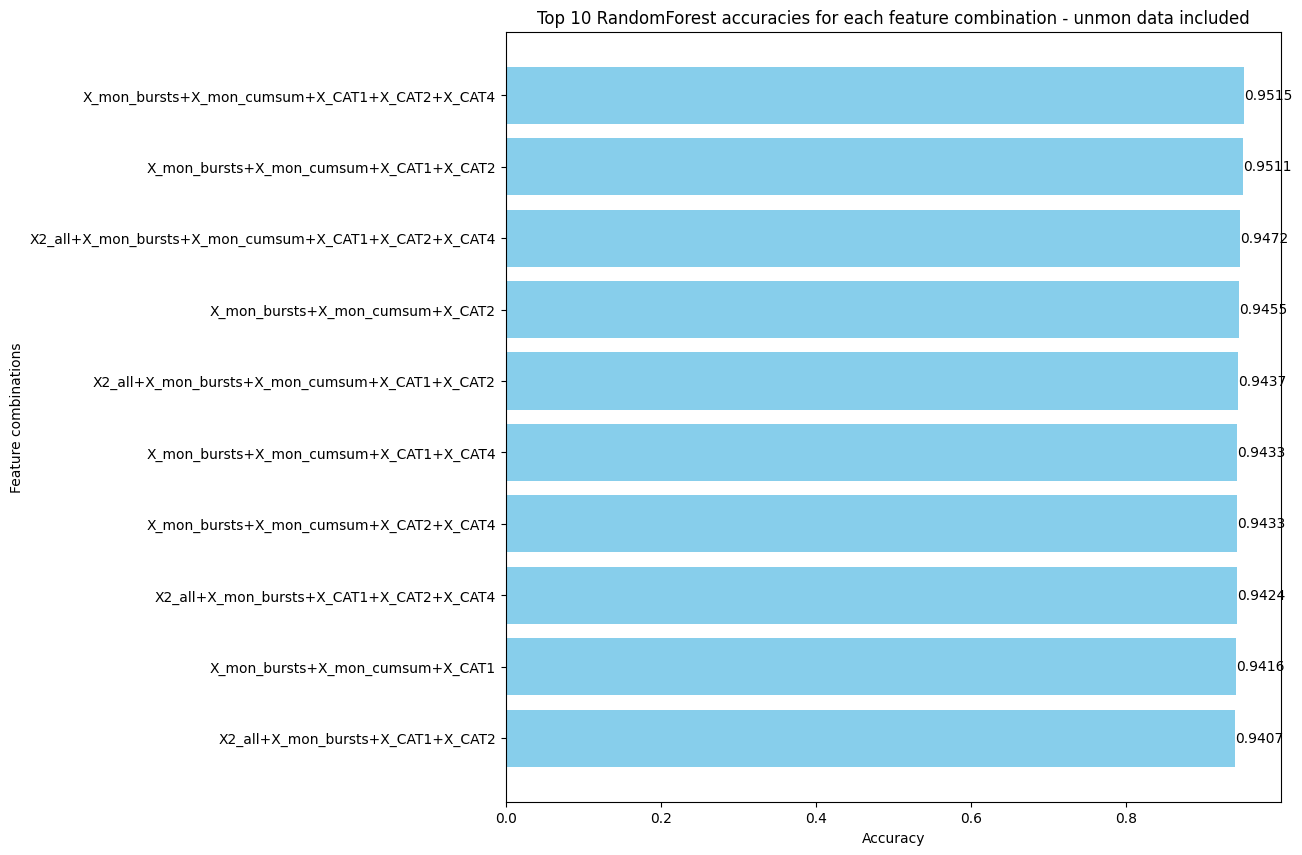

In [ ]:
import matplotlib.pyplot as plt

# 결과를 정확도에 따라 내림차순으로 정렬
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)

# 상위 10개만 선택
sorted_results = sorted_results[:10]

# 피처 조합과 정확도를 분리
feature_combinations, accuracies = zip(*sorted_results)

# 피처 조합을 문자열로 변환
feature_combinations = ['+'.join(features) for features in feature_combinations]

# 막대 그래프 생성
plt.figure(figsize=(10, 10))
bars = plt.barh(feature_combinations, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Feature combinations')
plt.title('Top 10 RandomForest accuracies for each feature combination - unmon data included')

# 결과값(result)을 막대 옆에 출력
for bar, result in zip(bars, sorted_results):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{result[1]:.4f}', va='center', ha='left')

plt.gca().invert_yaxis()  # y축을 내림차순으로 정렬
plt.show()
